### Summary from part 2

We are going to reload the reviews data from csv file

In [1]:
import pandas as pd

In [2]:
reviews_df = pd.read_csv('yelp_reviews_clemson_sc.csv')

In [3]:
reviews_df.head()

,Review,author,date,rating,restaurant
0,"[""Unbelievable! \xa0When I went to Clemson, th...",['Tony F.'],['\n 5/18/2019\n '],['5.0 star rating'],"['Yolk Asian', 'Kitchen']"
1,['I love this place. Great value and great foo...,['Jeffery H.'],['\n 5/13/2019\n '],['4.0 star rating'],"['Yolk Asian', 'Kitchen']"
2,['Truly a hidden gem amongst the chains along ...,['Doug S.'],['\n 3/31/2019\n '],['5.0 star rating'],"['Yolk Asian', 'Kitchen']"
3,"[""Yolk is honestly my favorite restaurant in t...",['Sam S.'],"['\n 7/26/2019\n ', '\n ...","['5.0 star rating', '5.0 star rating']","['Yolk Asian', 'Kitchen']"
4,"[""YUM! \xa0We go here every chance we get when...",['Scott S.'],['\n 6/15/2019\n '],['5.0 star rating'],"['Yolk Asian', 'Kitchen']"


We are going to load the following libraries to help with the descriptive analysis process

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Remove invalid rows

In [5]:
reviews_df = reviews_df.dropna()

#### Remove unnecessary symbols and phrases

In [18]:
clean_reviews_df = pd.DataFrame()

In [19]:
for i in range(0,20):
    print(reviews_df.restaurant[i])

['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']
['Yolk Asian', 'Kitchen']


In [20]:
clean_reviews_df['Review'] = reviews_df.Review.str[2:-2]
clean_reviews_df['author'] = reviews_df.author.str[2:-2]
clean_reviews_df['date'] = reviews_df.date.str[12:22].str.lstrip(' ').str.rstrip('\\n')
clean_reviews_df['rating'] = reviews_df.rating.str[2:5]
clean_reviews_df['restaurant'] = reviews_df.restaurant.str.replace("', '", " ").str[2:-2]

In [21]:
clean_reviews_df.head(15)

,Review,author,date,rating,restaurant
0,"Unbelievable! \xa0When I went to Clemson, the ...",Tony F.,5/18/2019,5.0,Yolk Asian Kitchen
1,I love this place. Great value and great food....,Jeffery H.,5/13/2019,4.0,Yolk Asian Kitchen
2,Truly a hidden gem amongst the chains along Ti...,Doug S.,3/31/2019,5.0,Yolk Asian Kitchen
3,Yolk is honestly my favorite restaurant in the...,Sam S.,7/26/2019,5.0,Yolk Asian Kitchen
4,YUM! \xa0We go here every chance we get when v...,Scott S.,6/15/2019,5.0,Yolk Asian Kitchen
5,I have been to Yolk more times than I can coun...,Clare B.,6/16/2019,5.0,Yolk Asian Kitchen
6,Had the Tiger and it was delicious. Did not ha...,Jim A.,7/3/2019,5.0,Yolk Asian Kitchen
7,Really love this place and the food. Come here...,Rebecca W.,2/3/2019,5.0,Yolk Asian Kitchen
8,Not impressed. Most meals are served in a heat...,Barry S.,4/30/2019,2.0,Yolk Asian Kitchen
9,Fantastic Korean street food. Be prepared to s...,Matt T.,4/13/2019,5.0,Yolk Asian Kitchen


In [22]:
clean_reviews_df['score'] = clean_reviews_df.rating.astype(float)

In [23]:
clean_reviews_df.describe()

,score
count,2031.000000
mean,3.488429
std,1.514052
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [24]:
clean_reviews_df['review_length'] = clean_reviews_df['Review'].apply(lambda x: len(x) - x.count(' '))
clean_reviews_df['Month'], clean_reviews_df['Day'], clean_reviews_df['Year'] = clean_reviews_df['date'].str.split('/').str

In [25]:
clean_reviews_df.head(15)

,Review,author,date,rating,restaurant,score,review_length,Month,Day,Year
0,"Unbelievable! \xa0When I went to Clemson, the ...",Tony F.,5/18/2019,5.0,Yolk Asian Kitchen,5.0,180,5,18,2019
1,I love this place. Great value and great food....,Jeffery H.,5/13/2019,4.0,Yolk Asian Kitchen,4.0,285,5,13,2019
2,Truly a hidden gem amongst the chains along Ti...,Doug S.,3/31/2019,5.0,Yolk Asian Kitchen,5.0,374,3,31,2019
3,Yolk is honestly my favorite restaurant in the...,Sam S.,7/26/2019,5.0,Yolk Asian Kitchen,5.0,194,7,26,2019
4,YUM! \xa0We go here every chance we get when v...,Scott S.,6/15/2019,5.0,Yolk Asian Kitchen,5.0,207,6,15,2019
5,I have been to Yolk more times than I can coun...,Clare B.,6/16/2019,5.0,Yolk Asian Kitchen,5.0,590,6,16,2019
6,Had the Tiger and it was delicious. Did not ha...,Jim A.,7/3/2019,5.0,Yolk Asian Kitchen,5.0,83,7,3,2019
7,Really love this place and the food. Come here...,Rebecca W.,2/3/2019,5.0,Yolk Asian Kitchen,5.0,257,2,3,2019
8,Not impressed. Most meals are served in a heat...,Barry S.,4/30/2019,2.0,Yolk Asian Kitchen,2.0,671,4,30,2019
9,Fantastic Korean street food. Be prepared to s...,Matt T.,4/13/2019,5.0,Yolk Asian Kitchen,5.0,234,4,13,2019


Remove restaurants with too few reviews ...

In [36]:
restaurants = clean_reviews_df.groupby('restaurant').rating.count()
restaurants

restaurant
356                                         21
4 Paws American Pub                         17
All In Coffee Shop                          56
Amici Clemson                               28
BGR The Burger Joint                        66
Backstreets Pub & Grill                    112
Bake and Cook Thai Restaurant               51
Blue Heron Restaurant & Sushi Bar          132
Bojangles                                    6
Boscobel Golf Club Pro Shop                  2
Calhoun Corners Restaurant                  45
Charleston Sports Pub                       14
Chick-fil-A                                 11
China Express                               22
Chipotle Mexican Grill                       9
Clemson Confectioneries                     13
Columbo’s Pizza                             25
Cook Out                                    23
Domino’s Pizza                               8
Dunkin’ Donuts                              13
El Jimador Mexican Restaurant               44
El

In [37]:
restaurants = restaurants[restaurants > 40]
restaurants

restaurant
All In Coffee Shop                         56
BGR The Burger Joint                       66
Backstreets Pub & Grill                   112
Bake and Cook Thai Restaurant              51
Blue Heron Restaurant & Sushi Bar         132
Calhoun Corners Restaurant                 45
El Jimador Mexican Restaurant              44
IHOP                                       53
Palmetto’s Smokehouse and Oyster Bar       51
Pixie & Bill’s                             54
Pot Belly Deli                             74
Sardi’s Den                                47
Spill The Beans Clemson                    41
The Esso Club                              55
Tiger Town Tavern                          41
Todaro Pizza                               48
Tokyo Japanese Steak House & Sushi Bar     49
Yolk Asian Kitchen                        118
Your Pie                                   44
Zen Ramen & Sushi Burrito                  41
Name: rating, dtype: int64

In [34]:
clean_reviews_df['restaurant'] = clean_reviews_df.restaurant.str.lstrip("one, '")

In [38]:
list(restaurants.index)

['All In Coffee Shop',
 'BGR The Burger Joint',
 'Backstreets Pub & Grill',
 'Bake and Cook Thai Restaurant',
 'Blue Heron Restaurant & Sushi Bar',
 'Calhoun Corners Restaurant',
 'El Jimador Mexican Restaurant',
 'IHOP',
 'Palmetto’s Smokehouse and Oyster Bar',
 'Pixie & Bill’s',
 'Pot Belly Deli',
 'Sardi’s Den',
 'Spill The Beans Clemson',
 'The Esso Club',
 'Tiger Town Tavern',
 'Todaro Pizza',
 'Tokyo Japanese Steak House & Sushi Bar',
 'Yolk Asian Kitchen',
 'Your Pie',
 'Zen Ramen & Sushi Burrito']

In [39]:
restaurant_df = clean_reviews_df[clean_reviews_df.restaurant.isin(list(restaurants.index))]
restaurant_df

,Review,author,date,rating,restaurant,score,review_length,Month,Day,Year
0,"Unbelievable! \xa0When I went to Clemson, the ...",Tony F.,5/18/2019,5.0,Yolk Asian Kitchen,5.0,180,5,18,2019
1,I love this place. Great value and great food....,Jeffery H.,5/13/2019,4.0,Yolk Asian Kitchen,4.0,285,5,13,2019
2,Truly a hidden gem amongst the chains along Ti...,Doug S.,3/31/2019,5.0,Yolk Asian Kitchen,5.0,374,3,31,2019
3,Yolk is honestly my favorite restaurant in the...,Sam S.,7/26/2019,5.0,Yolk Asian Kitchen,5.0,194,7,26,2019
4,YUM! \xa0We go here every chance we get when v...,Scott S.,6/15/2019,5.0,Yolk Asian Kitchen,5.0,207,6,15,2019
5,I have been to Yolk more times than I can coun...,Clare B.,6/16/2019,5.0,Yolk Asian Kitchen,5.0,590,6,16,2019
6,Had the Tiger and it was delicious. Did not ha...,Jim A.,7/3/2019,5.0,Yolk Asian Kitchen,5.0,83,7,3,2019
7,Really love this place and the food. Come here...,Rebecca W.,2/3/2019,5.0,Yolk Asian Kitchen,5.0,257,2,3,2019
8,Not impressed. Most meals are served in a heat...,Barry S.,4/30/2019,2.0,Yolk Asian Kitchen,2.0,671,4,30,2019
9,Fantastic Korean street food. Be prepared to s...,Matt T.,4/13/2019,5.0,Yolk Asian Kitchen,5.0,234,4,13,2019


#### First analysis: Visual review lengths

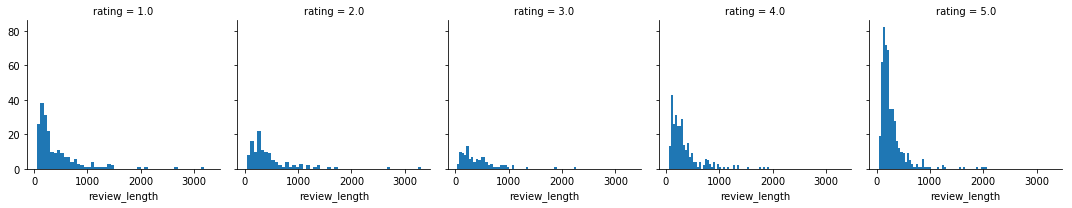

In [40]:
hist = sns.FacetGrid(data=restaurant_df, col='rating')
hist.map(plt.hist, 'review_length', bins=50)

Looks interesting, but not quite visible yet. Let's try another view

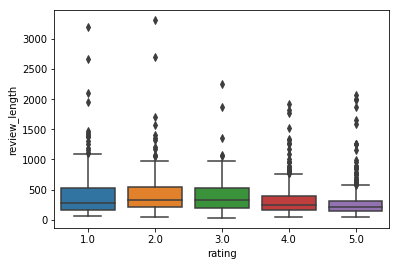

In [41]:
sns.boxplot(x='rating', y='review_length', data=restaurant_df)

#### Yet another graphical library: ggplot

In [42]:
!pip install plotnine

In [43]:
%matplotlib inline
import plotnine as p9
p9.options.figure_size = (8, 6)

#### Plotting distributions

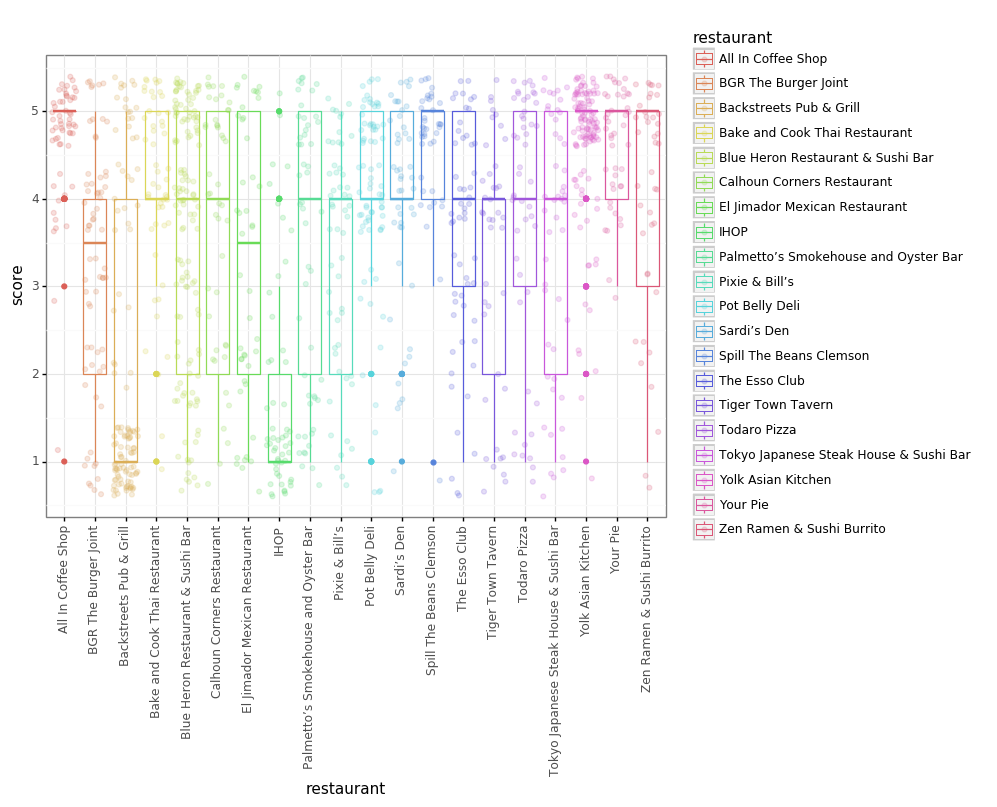

<ggplot: (-9223363255356497194)>

In [44]:
(p9.ggplot(data=restaurant_df,
           mapping=p9.aes(x='restaurant',
                          y='score',color='restaurant'))
    + p9.geom_jitter(alpha=0.2)
    + p9.geom_boxplot(alpha=0.)
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)

#### How have the review ratings evolved over time for the restaurants?

In [45]:
yearly_counts = restaurant_df.groupby(['Year', 'restaurant'])['score'].mean()
yearly_counts.head()

Year  restaurant                       
2007  Todaro Pizza                         5.0
2008  Blue Heron Restaurant & Sushi Bar    4.0
      Todaro Pizza                         5.0
2009  Calhoun Corners Restaurant           4.0
      Pixie & Bill’s                       4.0
Name: score, dtype: float64

When checking the result of the previous calculation, we actually have both the year and the species_id as a row index. We can reset this index to use both as column variable:

In [46]:
yearly_counts = yearly_counts.reset_index(name='score')
yearly_counts['Year'] = yearly_counts.Year.astype(int)

In [47]:
yearly_counts=yearly_counts[yearly_counts.Year > 2007]

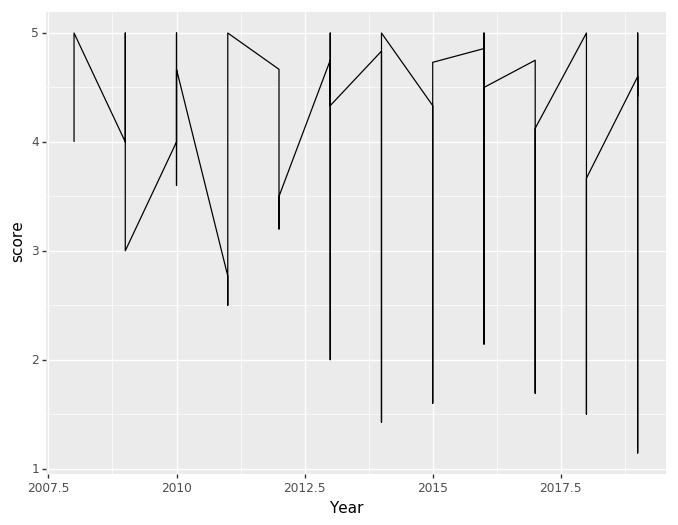

<ggplot: (-9223363255386237205)>

In [48]:
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='Year',
                          y='score'))
    + p9.geom_line()
)

Unfortunately this does not work, because we plot data for all the species together. We need to tell plotnine to draw a line for each restaurant by modifying the aesthetic function and map the restaurant to the color:

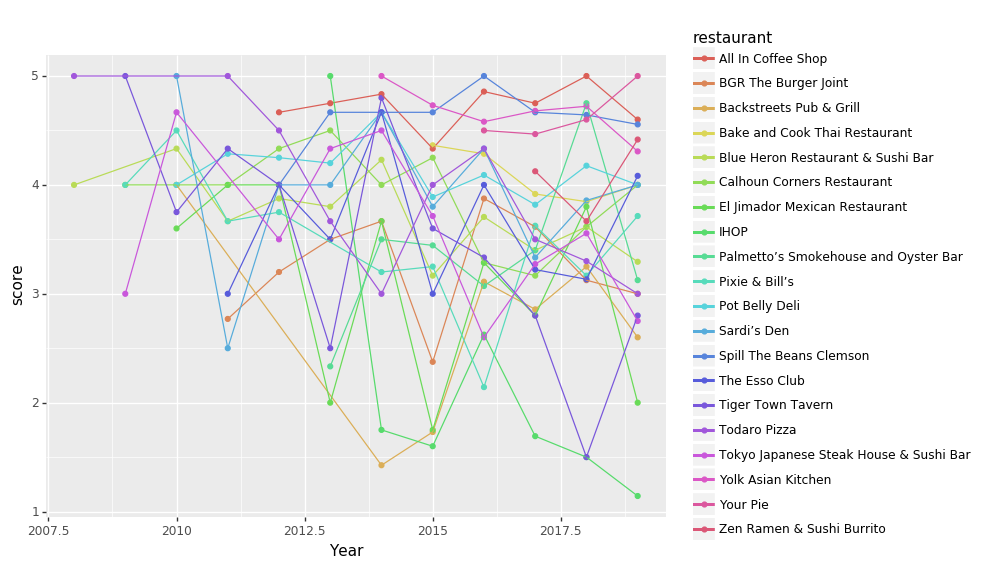

<ggplot: (8781413322728)>

In [49]:
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='Year',
                          y='score',
                          color='restaurant'))
    + p9.geom_point()
    + p9.geom_line()
)

#### Faceting

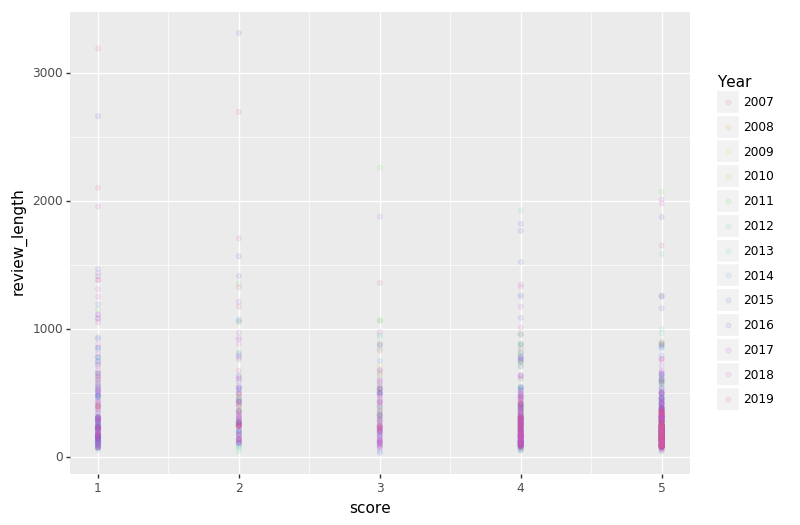

<ggplot: (8781468537043)>

In [50]:
(p9.ggplot(data=restaurant_df,
           mapping=p9.aes(x='score',
                          y='review_length',
                          color='Year'))
    + p9.geom_point(alpha=0.1)
)

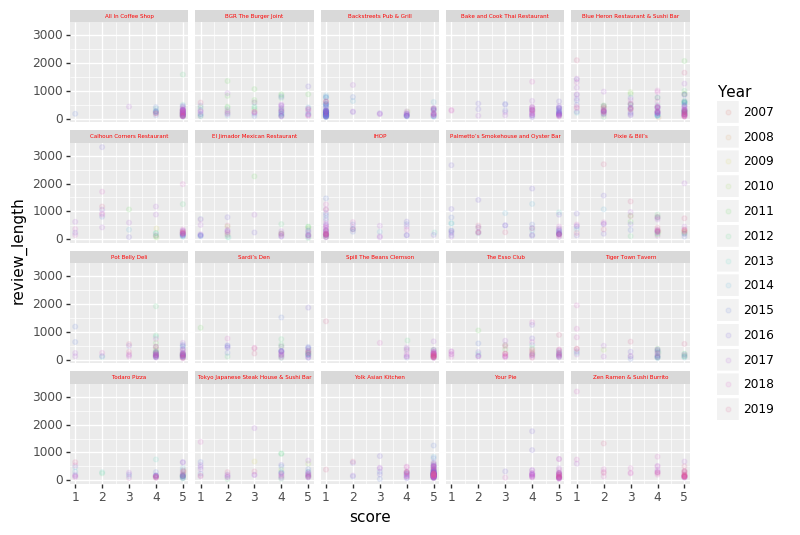

<ggplot: (-9223363255382012956)>

In [51]:
(p9.ggplot(data=restaurant_df,
           mapping=p9.aes(x='score',
                          y='review_length',
                          color='Year'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("restaurant")
    + p9.theme(strip_text_x = p9.element_text(size = 4, colour = "red"))
)